In [11]:
# obtain a default Argument object that will be used to call the compiler
import approx_gradient
args = approx_gradient.get_args([])

In [12]:
# chooses from 'hl', 'tf', 'torch'
backend = 'hl'
dest_dir = '/n/fs/scratch/yutingy/siggraph'

In [13]:
# Optimization settings
args.dir = dest_dir
args.shader = 'siggraph'
args.backend = backend
args.init_values_pool = 'apps/example_init_values/test_finite_diff_siggraph_cone_init_values_pool.npy'
args.modes = 'optimization'
args.metrics = '5_scale_L2'
args.smoothing_sigmas = '0.5,1,2,5'
args.learning_rate = 0.01
args.render_size = '960,960'
args.gt_file = 'siggraph_gradient.png'
if backend == 'hl':
    args.gt_transposed = True
else:
    args.gt_transposed = False
args.multi_scale_optimization = True
args.alternating_times = 5
args.tunable_param_random_var = True
args.tunable_param_random_var_opt = True
args.tunable_param_random_var_seperate_opt = True
args.tunable_param_random_var_std = 1.
args.save_all_loss = True
args.reset_opt_each_scale = False
args.reset_sigma = False
if args.backend in ['tf', 'torch']:
    args.verbose = True
else:
    args.verbose = False
args.save_best_par = True

In [14]:
approx_gradient.main(args)

cd apps; python render_single.py /n/fs/scratch/yutingy/siggraph render_siggraph --backend hl --compiler_modes fw,fw_random_par,bw_random_par,producer_random_par,fw_prune_updates --use_select_rule 1 --use_multiplication_rule 1 --ndims 2 ; cd ..
loaded compiler_problem from /n/fs/scratch/yutingy/siggraph
initialize y pyramic, conv with sigma  0.5
initialize y pyramic, conv with sigma  1.0
initialize y pyramic, conv with sigma  2.0
initialize y pyramic, conv with sigma  5.0
reset_min set to True for newly created buffers
Instantiated buffer 0 with shape  (962, 962, 6)
reset_min set to True for newly created buffers
Instantiated buffer 0 with shape  (960, 960, 3)
Instantiated buffer 1 with shape  (962, 962, 6)
Instantiated buffer 2 with shape  (960, 960, 18)
Instantiated buffer 3 with shape  (960, 960, 26)
Instantiated buffer 4 with shape  (960, 960, 26)
Instantiated buffer 5 with shape  (960, 960, 26)
Instantiated buffer 6 with shape  (960, 960, 26)
Instantiated buffer 7 with shape  (960,

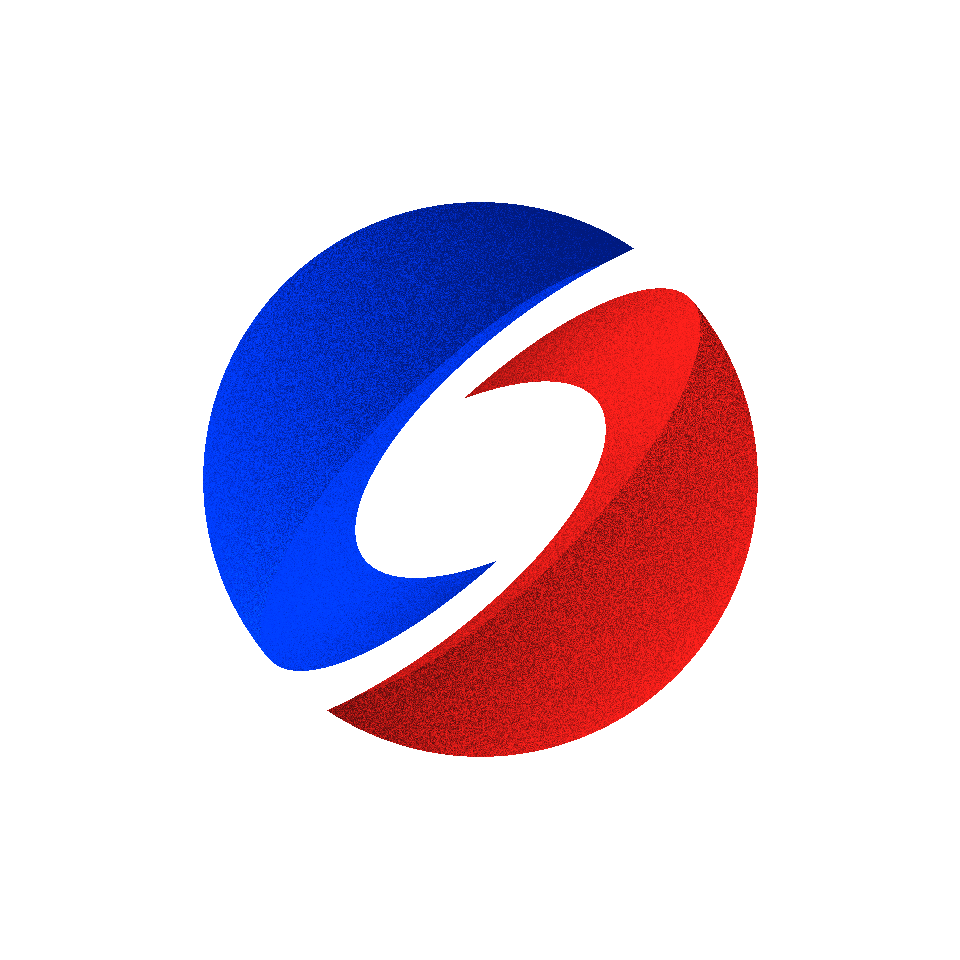

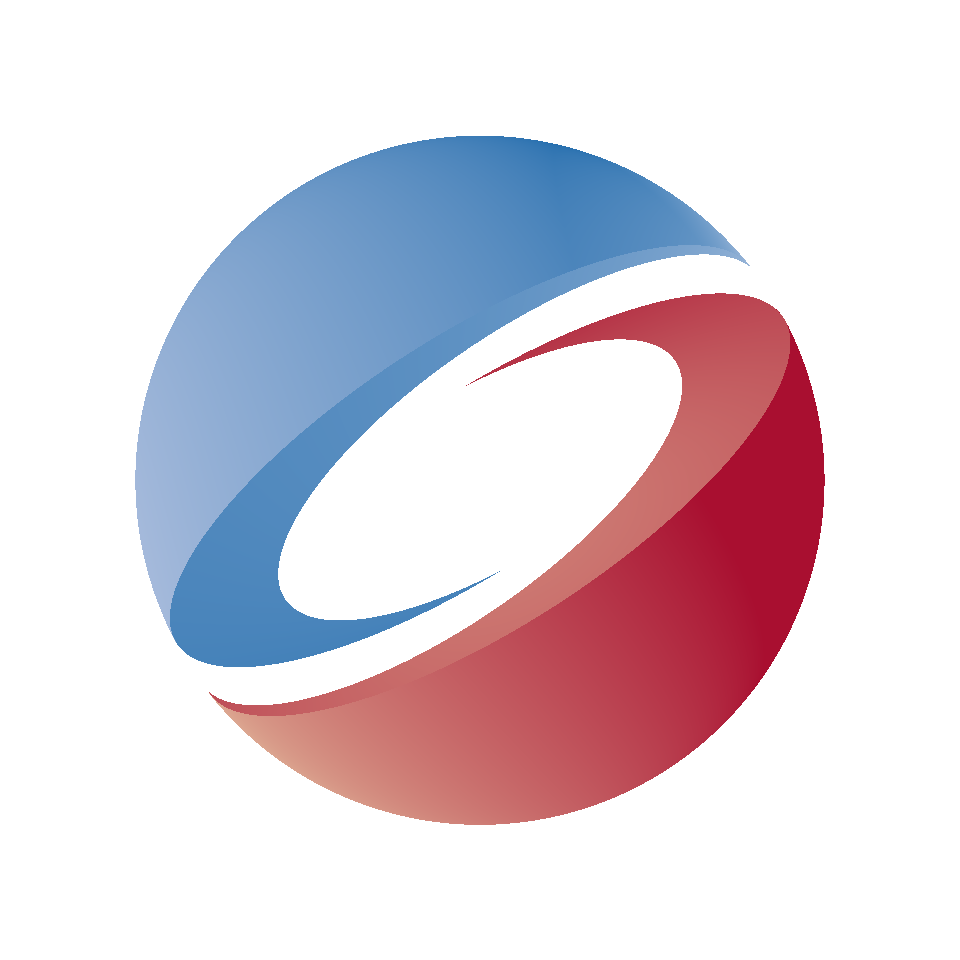

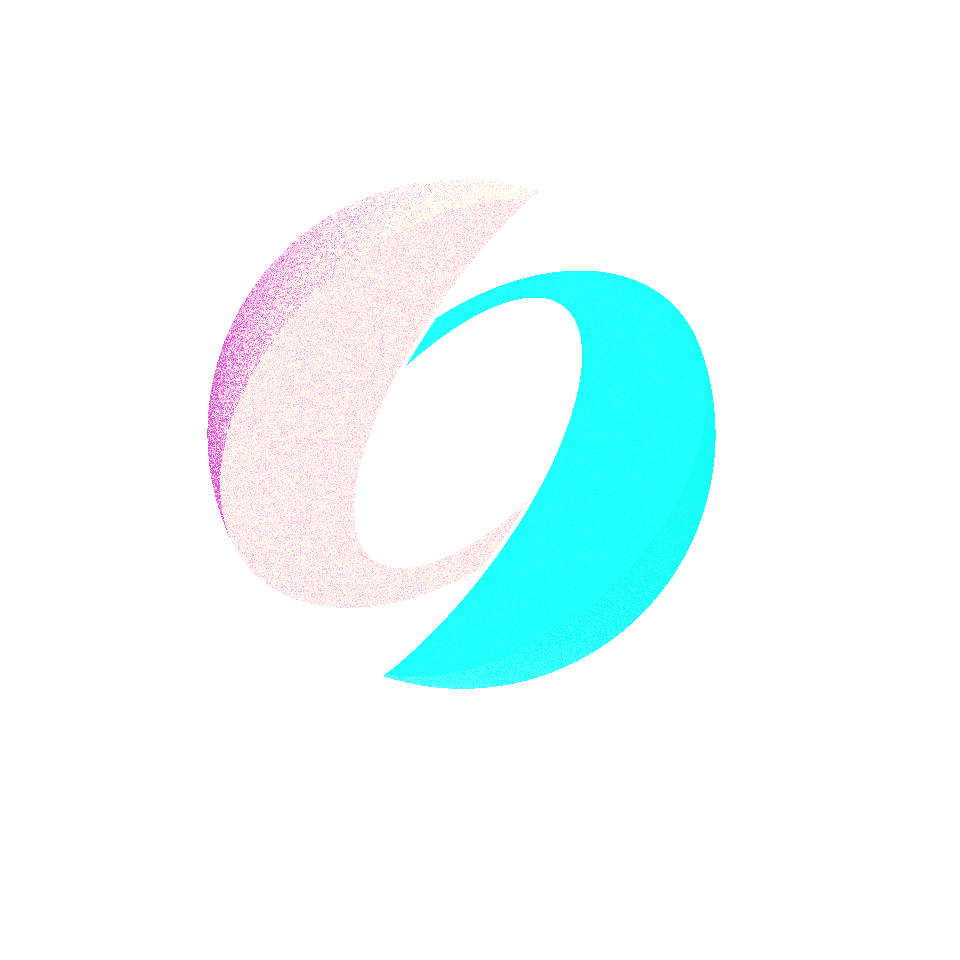

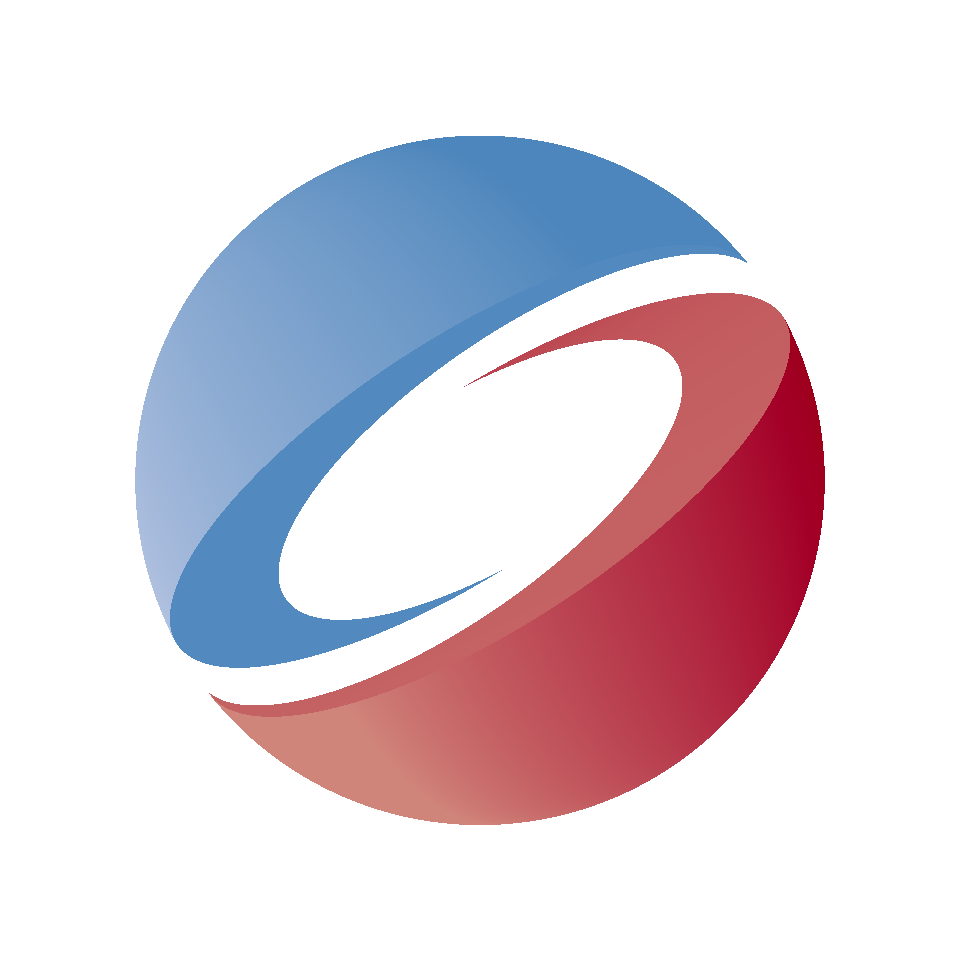

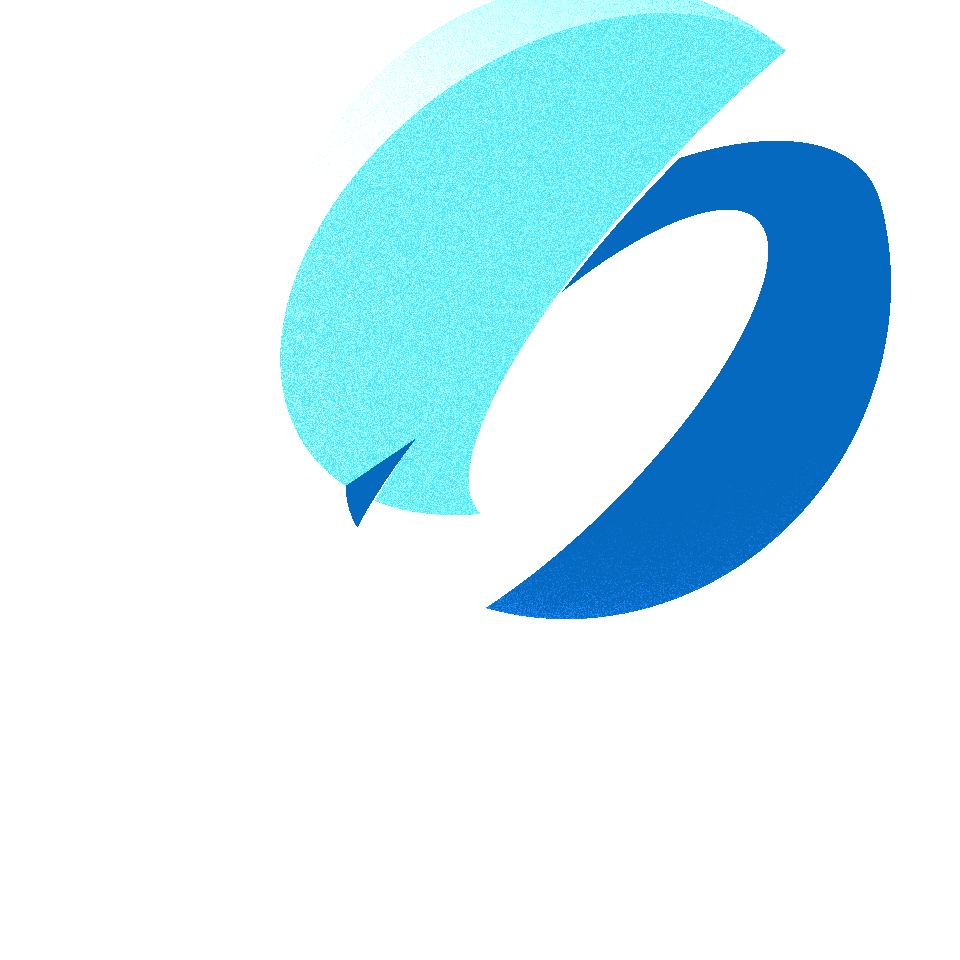

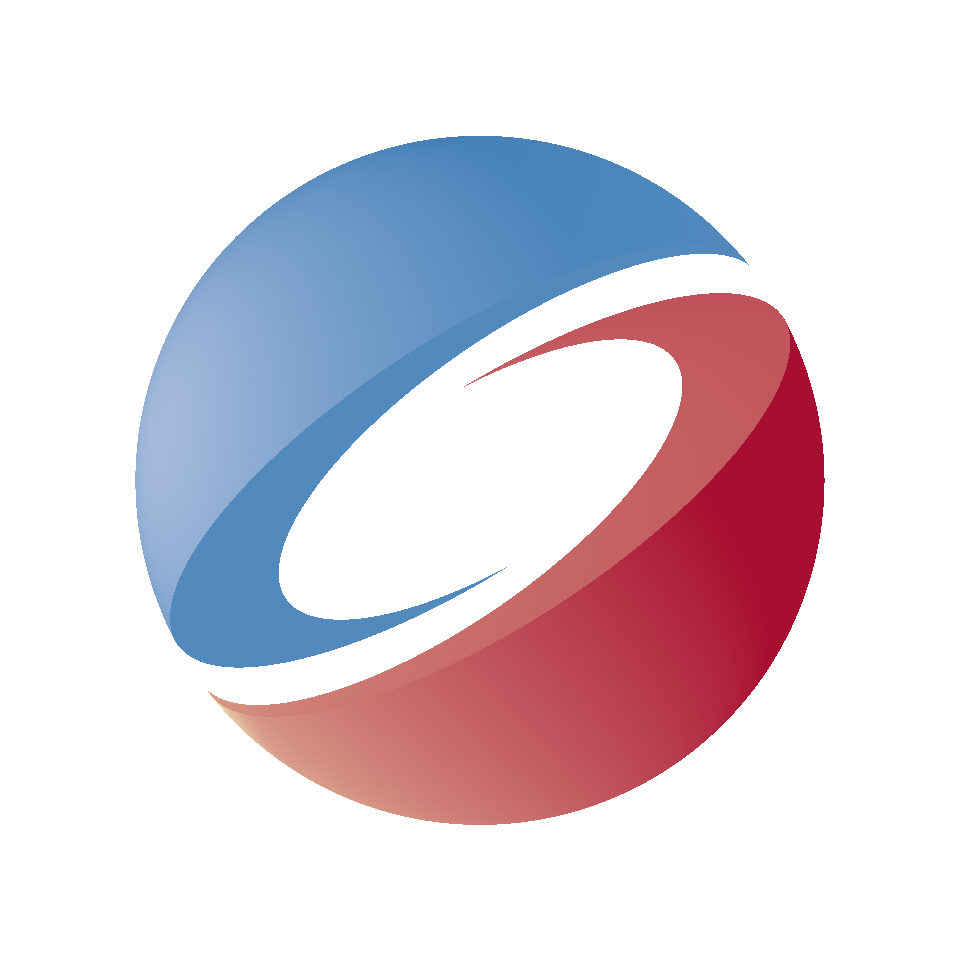

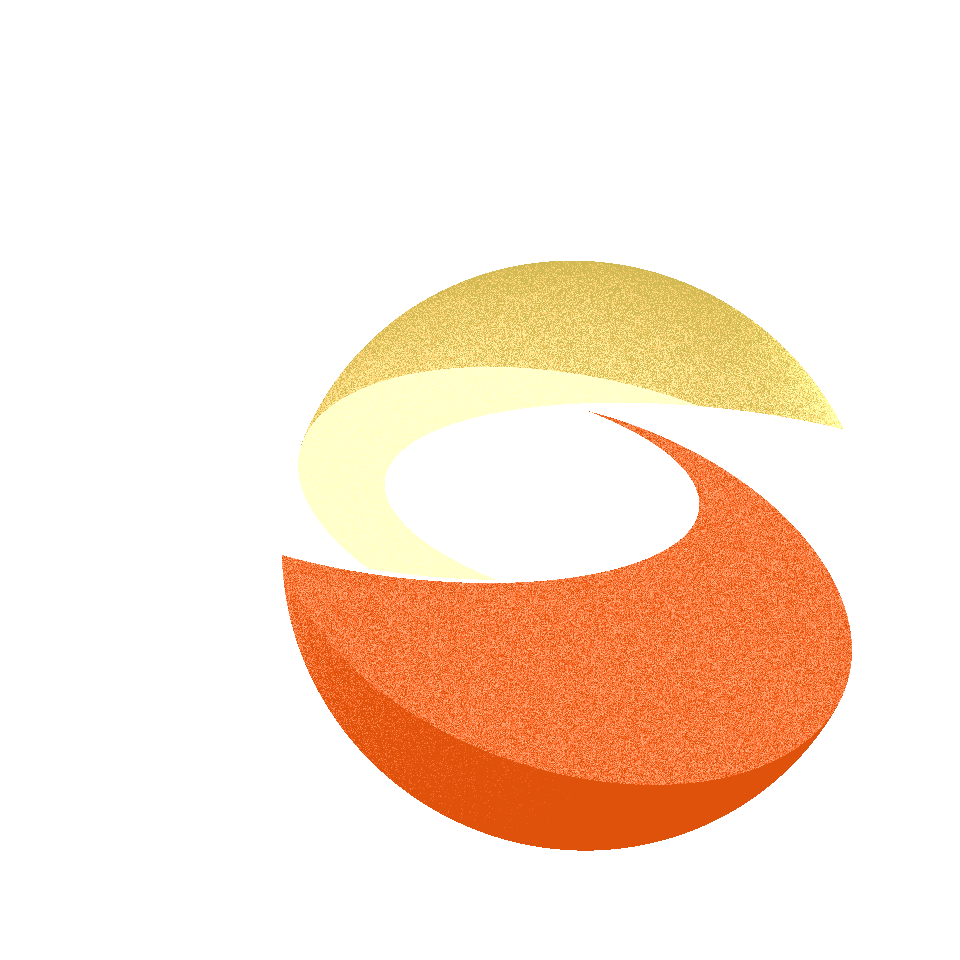

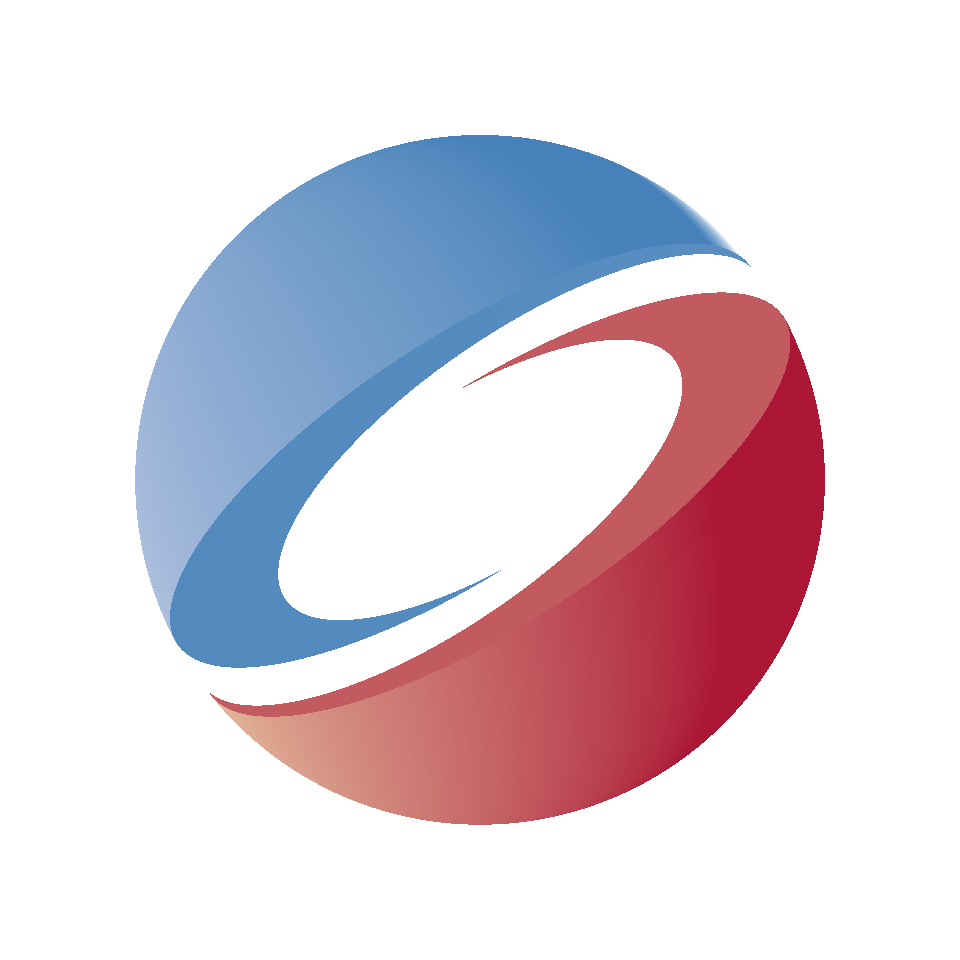

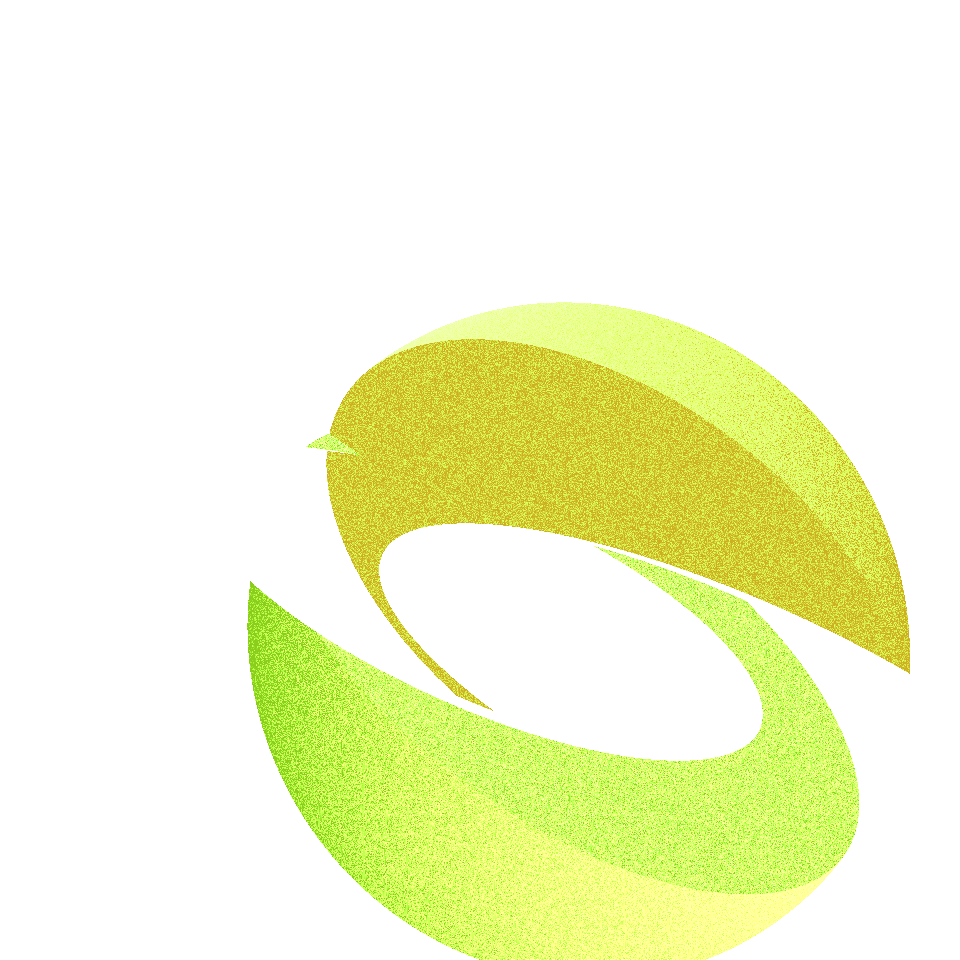

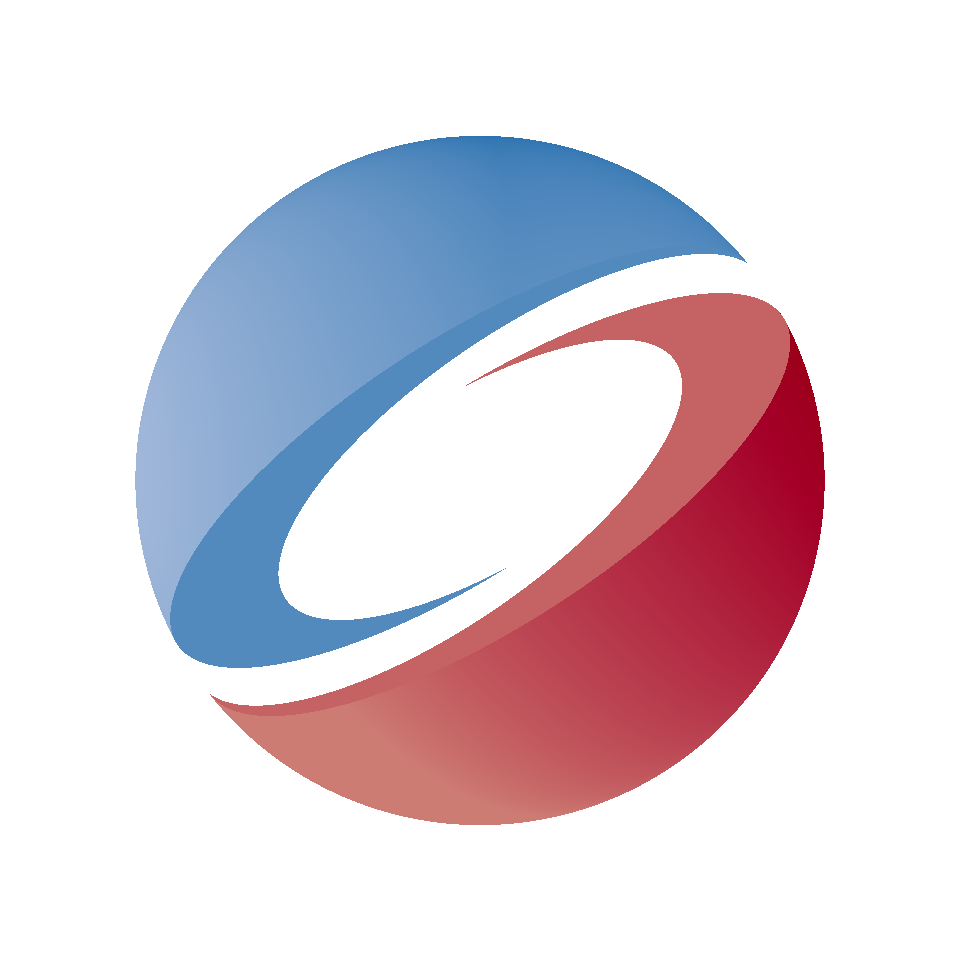

In [15]:
import os
from IPython.display import Image, display

listOfImageNames = []

for i in range(5):
    listOfImageNames.append(os.path.join(args.dir, 'init%d.png' % i))
    listOfImageNames.append(os.path.join(args.dir, 'ours_%s_%s_%.1e_result%d_0.png' % (args.metrics,
                                                                                       args.optimizer,
                                                                                       args.learning_rate,
                                                                                       i)))

for imageName in listOfImageNames:
    display(Image(filename=imageName, width=300))